## Домашняя работа #2.
Домашнее задание сдаётся в виде ссылки (с доступом комментатор или редактор) на Colab в опросе: https://forms.gle/uLK765hzD8RhvyNx8

Отправлять ссылку через форму нужно только один раз. Исправления вносятся в тот же ноутбук до хард-дедлайна и помечаются комментариями в коде и комментариями к соотвествующим ячейкам.

Эта домашка про Фурье и немного про простейшие фильтры.

**Soft deadline: 10.02.2022 03:00:00 +0003 GMT**

**Hard deadline: 17.02.2022 03:00:00 +0003 GMT**

Ссылка на материалы: https://drive.google.com/drive/folders/1WZsXgicKZYJ4-OOGGQcLUpj7T_u60for?usp=sharing

In [159]:
# ПРИМОНТИРУЙТЕ ДИСК К НОУТБУКУ
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [160]:
from pathlib import Path
# ИЗМЕНИТЕ ЭТОТ ПУТЬ НА ТОТ, КУДА ВЫ ПОЛОЖИЛИ МАТЕРИАЛЫ КУРСА
#sources_path = Path("/content/drive/MyDrive/CV course presentations/CSC2021/sources")
sources_path = Path('/content/drive/MyDrive/HSE/CV/cv2/homework2-materials')

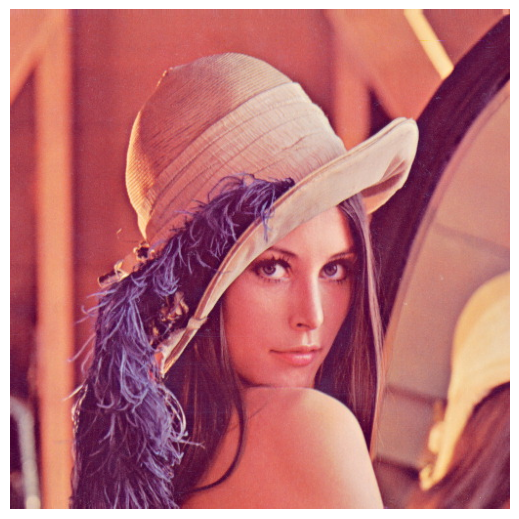

In [161]:
import cv2
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.style.use('default')

def pyplot(func):
    def make_pyplot_context(*args, **kwargs):
        plt.figure(figsize=(10, 5))
        ax = plt.axes([0,0,1,1], frameon=False)
        ax.set_axis_off()
        return func(*args, **kwargs)
    return make_pyplot_context

@pyplot
def show_bgr(img):
    plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))

@pyplot
def show_gray(img):
    plt.imshow(img, cmap='gray')

def mse(img1, img2):
    return ((img1.astype(int) - img2.astype(int)) ** 2).mean()

lena = cv2.imread(str(sources_path / "lena.jpg"))
show_bgr(lena)



**1. (5 баллов)**

Загрузите изображение $lena.jpg$ (512х512). Переведите изображение в градации серого. Произведите фильтрацию данного изображения в частотной области идеальным фильтром низких частот (фильтр, обрезающий все высокочастотные составляющие Фурье-образа, находящиеся на большем расстоянии от начала координат, чем некоторое заданное расстояние $D$), идеальным фильтром высоких частот (фильтр, обрезающий все низкокочастотные составляющие Фурье-образа, находящиеся на меньшем расстоянии от начала координат, чем некоторое заданное расстояние $D$) со следующими значениями радиуса фильтров:
1. 5
2. 15
3. 30
4. 255

Для каждого фильтра постройте состыкованное изображение из следующих: исходное изображение в градациях серого, изображение Фурье-спектра (после логарифмической коррекции для лучшей визуализации), изображение Фурье-спектра после фильтрации, изображение в пространственной области после фильтрации. На выходе должно получиться 8 изображений (4 параметра фильтров х 2 типа фильтров). Функции, которые Вам потребуются: $dft$, $mulSpectrums$, $idft$.

In [162]:
def magnitude_create(complexI, mode= None):
    magnitude = cv2.magnitude(complexI[:, :, 0], complexI[:, :, 1])
    if mode == 'log':
        return np.log(1 + magnitude)
    return magnitude


def plot(*args, j):
    for i, x in enumerate(args):
        plt.subplot(8, 4, i+ 4*j + 1)
        plt.imshow(x, cmap='gray')
        plt.axis('off')

def mask_creator(R, mode, l, shape):
    mask = np.zeros(shape)
    # подефолту сделаем фильтр нижних частот
    for i in range(l - R, l + R):
        for j in range(l - R, l + R):
            if (i-l)**2 + (j-l)**2 <= R**2:
                mask[i, j] = 1
    if mode == 'high':
        return 1 - mask
    return mask

def filter(gray, D, mode='low'):
    complexI = np.fft.fftshift(cv2.dft(cv2.merge([gray, np.zeros(gray.shape)])))
    l = gray.shape[0] // 2
    mask = mask_creator(D, mode, l, gray.shape)
    mask = cv2.merge([mask] * 2)
    magnitude1 = magnitude_create(complexI, 'log')
    complexI = cv2.mulSpectrums(complexI, mask, 0)
    magnitude2 = magnitude_create(complexI, 'log')
    new_image = magnitude_create(cv2.idft(np.fft.ifftshift(complexI)))
    return gray, magnitude1, magnitude2, new_image



[]

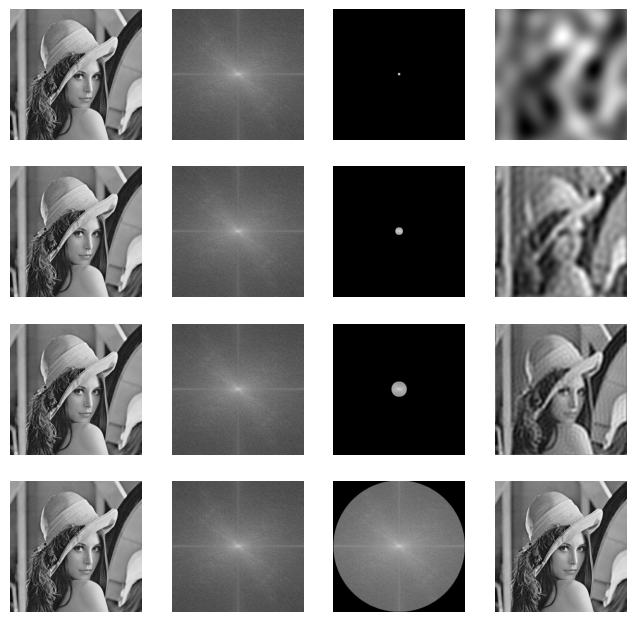

In [163]:
D = [5, 15, 30, 255]
plt.figure(figsize=(8, 16))
gray = cv2.cvtColor(lena, cv2.COLOR_BGR2GRAY).astype('float')
for j in range(4):
    plot(*filter(gray, D=D[j], mode='low'), j=j)
plt.plot()

[]

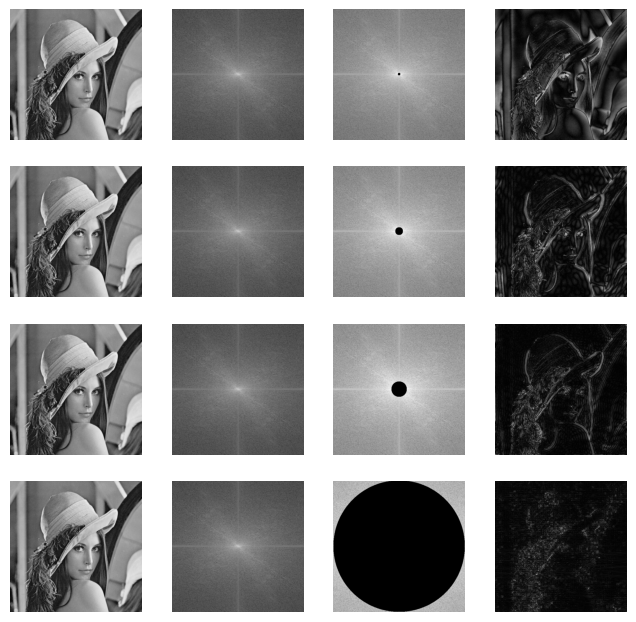

In [164]:
plt.figure(figsize=(8, 16))
for j in range(4):
    plot(*filter(gray, D=D[j], mode='high'), j=j)
plt.plot()

    **2. (5 баллов)**

Удалите диагональные полоски с изображения $lena\_diagonal.jpg$. Вычислите среднеквадратичную ошибку (mean squared error, $MSE$, \url{http://en.wikipedia.org/wiki/Mean_squared_error}) для полученного результата и изображения $lena\_gray\_512.tif$. Задача будет засчитана при $MSE < 1500$.

3484.66450881958


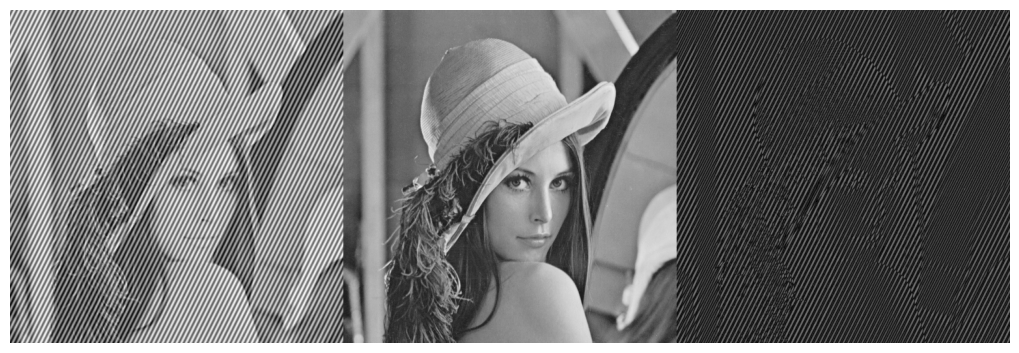

In [165]:
lena_diag = cv2.imread(str(sources_path / "lena_diagonal.jpg"), 0)
lena_gray_fix = cv2.imread(str(sources_path / "lena_gray_512.tif"), 0)

print(mse(lena_diag, lena_gray_fix))
show_gray(np.hstack([lena_diag.astype(int), lena_gray_fix.astype(int), np.abs(lena_diag.astype(int) - lena_gray_fix.astype(int))]))

Функция, нормирующая изображение на 0..255

In [166]:
def normalize(image):
    a = np.min(image)
    b = np.max(image)
    return (np.float32(image) - a)/b * 255

mse = 579.8


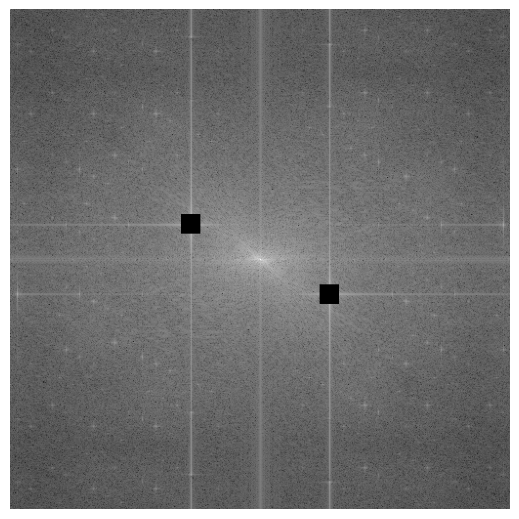

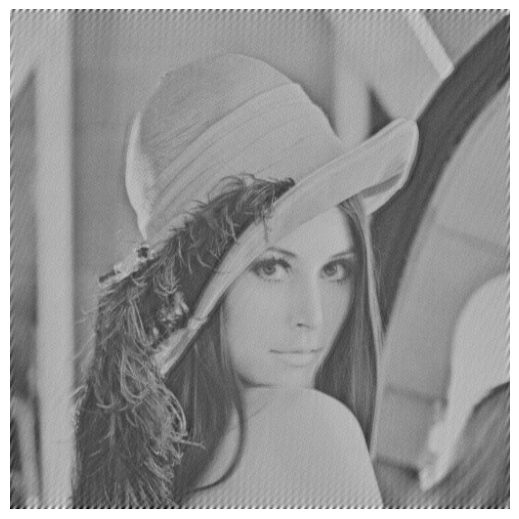

In [167]:
def lines_deleter(image):
    # image_fourier = cv2.dft(cv2.merge([image.astype('float'), np.zeros(image.shape)]))
    image_fourier = cv2.dft(np.float32(image), flags=cv2.DFT_COMPLEX_OUTPUT)
    magnitude = np.fft.fftshift(np.log(1 +cv2.magnitude(image_fourier[:, :, 0], image_fourier[:, :, 1])))
    magnitude[210:230, 175:195] = 0
    magnitude[282:302, 317:337] = 0
    show_gray(magnitude)
    image_fourier = np.fft.ifftshift(image_fourier)
    image_fourier[190:250, 155:215, :] = 0
    image_fourier[262:322, 317:357, :] = 0
    new_image = magnitude_create(cv2.idft(np.fft.ifftshift(image_fourier)))
    show_gray(new_image)
    return new_image

image = lines_deleter(lena_diag)
print(f'mse = {mse(normalize(image), lena_gray_fix):.1f}')

А это взрывающийся фурье

In [168]:
def foo(image):
    image_fourier = cv2.dft(cv2.merge([image.astype('float'), np.zeros(image.shape)]))
    res = magnitude_create(cv2.idft( image_fourier))
    return res

res = foo(lena_gray_fix)

64225279.99999857


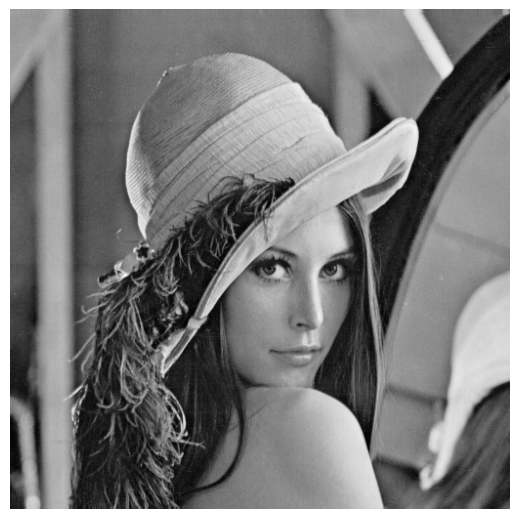

In [169]:
print(np.max(res))
show_gray(res)

**3. (10 баллов)**

Теперь предложите решение, которое бы работало для любого шума подобной природы. (синусоида некотрой частоты под некоторым углом) Смоделируйте изображение с шумом и предложите универсальный алгоритм, который решит задачу.
Тот, у кого по результатам проверки будет наименьшее значение MSE для предлженной картинки, получит призовую шоколадку (раньше мы раздавали призовые баллы, но теперь у нас концепция фиксированного максимального количества баллов)
Учтите, что помимо синусоидального шума, могут быть применены другие преобразования яркости.

---

Уточнение того, что требуется сделать:

* написать параметризованный генератор шума, которому можно задать произвольный угол, частоту полос и силу перекрытия, и получить шум с заданными параметрами

* усовершенствовать алгоритм из второй задачи, чтобы он работал на произвольных параметрах шума; тут полезно сделать интерактивный виджет, с помощью которого можно менять параметры шума и смотреть как справляется с ним алгоритм; интерактивный виджет проще всего сделать так:

    ```python
    from ipywidgets import interact

    @interact(angle=(0, 360, 1), freq=(1, 64, 1))
    def anim_general_solution(angle=45, freq=32):
        # visualization code here
    ```

* после обобщенным алгоритмом отчистить изображение из задачи 2 и посчитать MSE с чистым изображением, по этому MSE и будет конкурс за призовую шоколадку

In [170]:
def generate_noise(angle, freq, phase, power):
    '''
    angle - отсчитывается от нижнего левого края в положительном направлении, там где считаются kx, ky, я добавил pi/2, что бы было именно так
    freq - период колебаний (не частота, иначе частота 32 = 32 колебания в ячейке, тогда все будет однородное)
    phase - просто дополнительная фаза
    power - на сколько сильный шум
    '''
    ky = np.cos(angle/180*np.pi + np.pi/2) * 2*np.pi/freq
    kx = np.sin(angle/180*np.pi + np.pi/2) * 2*np.pi/freq
    h, w = lena_gray_fix.shape
    noise = np.array([[ np.sin(kx*i + ky*j + phase) for i in range(h, 0, -1)] for j in range(w, 0, -1)]) * 255 * power
    return noise + lena_gray_fix

# noised_lena = generate_noise(angle=45, freq=32, phase=0, power=0.5)

interactive(children=(IntSlider(value=45, description='angle', max=360), IntSlider(value=32, description='freq…

mse = 1585.7


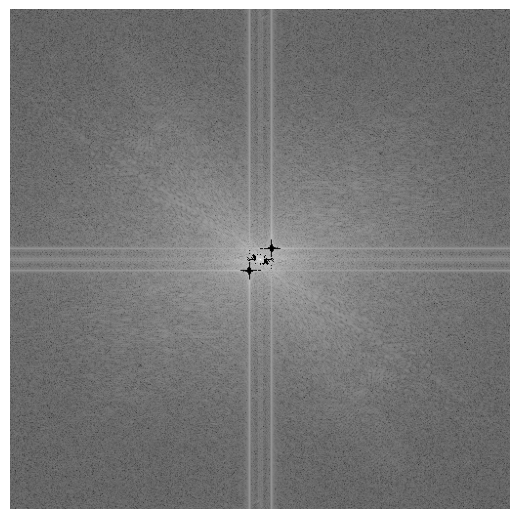

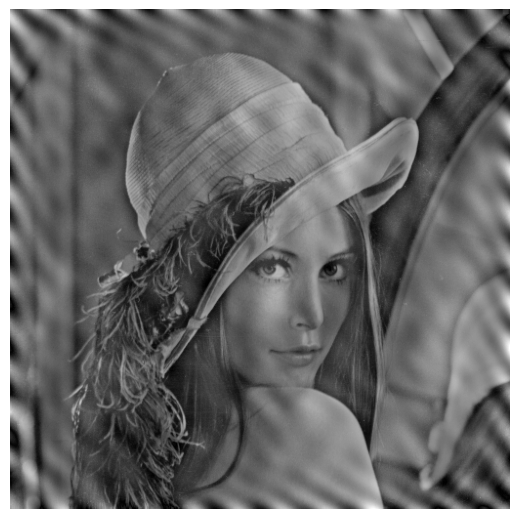

In [171]:
from ipywidgets import interact

@interact(angle=(0, 360, 1), freq=(1, 64, 1), phase=(0,1,0.1), power=(0,1,0.1))
def anim_general_solution(angle=45, freq=32, phase=0, power=0.5):
    image = generate_noise(angle=angle, freq=freq, phase=phase, power=power)
    image_fourier = cv2.dft(cv2.merge([image.astype('float'), np.zeros(image.shape)]))
    magnitude = np.fft.fftshift(np.log(1 +cv2.magnitude(image_fourier[:, :, 0], image_fourier[:, :, 1])))
    max_intensity = np.max(magnitude)
    h, w = image.shape
    alpha = 0.75
    d = 4
    mask = (magnitude > alpha * max_intensity)
    mask[h//2-d: h//2+d, w//2-d: w//2+d] = False
    magnitude[mask] = 0
    show_gray(magnitude)
    mask = cv2.merge([mask.astype('float')]*2)
    mask = 1 - mask
    image_fourier = cv2.mulSpectrums(np.fft.fftshift(image_fourier), mask, 0)
    new_image = magnitude_create(cv2.idft(np.fft.ifftshift(image_fourier)))
    show_gray(new_image)
    print(f'mse = {mse(normalize(new_image), lena_gray_fix):.1f}')

anim_general_solution()

А теперь обработаем картинку из 2го задания

In [172]:
def auto_lines_deleter(image, alpha=0.75, d=4):
    image_fourier = cv2.dft(cv2.merge([image.astype('float'), np.zeros(image.shape)]))
    magnitude = np.fft.fftshift(np.log(1 +cv2.magnitude(image_fourier[:, :, 0], image_fourier[:, :, 1])))
    max_intensity = np.max(magnitude)
    h, w = image.shape
    mask = (magnitude > alpha * max_intensity)
    mask[h//2-d: h//2+d, w//2-d: w//2+d] = False
    magnitude[mask] = 0
    # show_gray(magnitude)
    mask = cv2.merge([mask.astype('float')]*2)
    mask = 1 - mask
    image_fourier = cv2.mulSpectrums(np.fft.fftshift(image_fourier), mask, 0)
    new_image = magnitude_create(cv2.idft(np.fft.ifftshift(image_fourier)))
    return magnitude, new_image

Сделаем с дефолтными настройками alpha=0.75 и d=4, как в 4м задании

mse = 1085.5


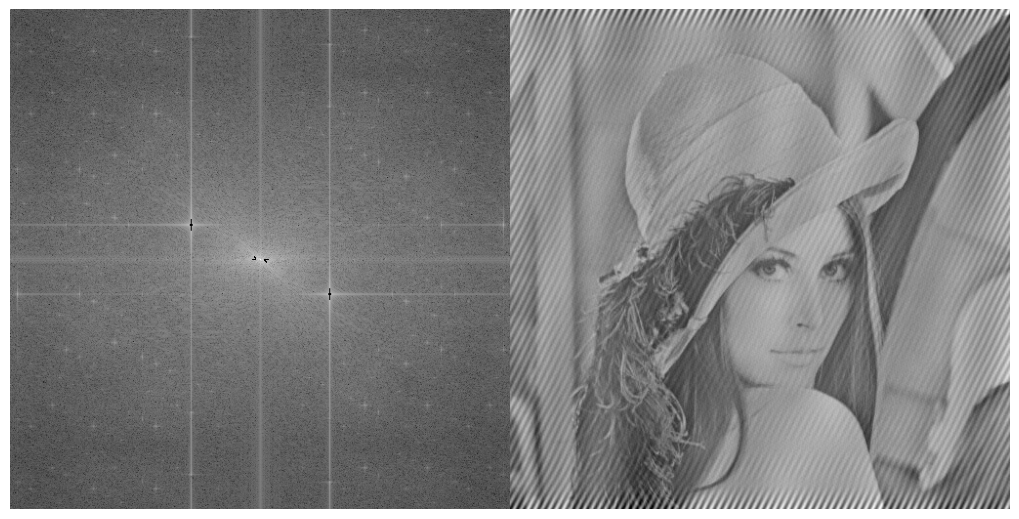

In [173]:
magnitude, new_image = auto_lines_deleter(lena_diag)
magnitude, new_image = normalize(magnitude), normalize(new_image)
show_gray(np.hstack([magnitude, new_image]))
print(f'mse = {mse(new_image, lena_gray_fix):.1f}')

Теперь подберем параметры

mse = 682.7


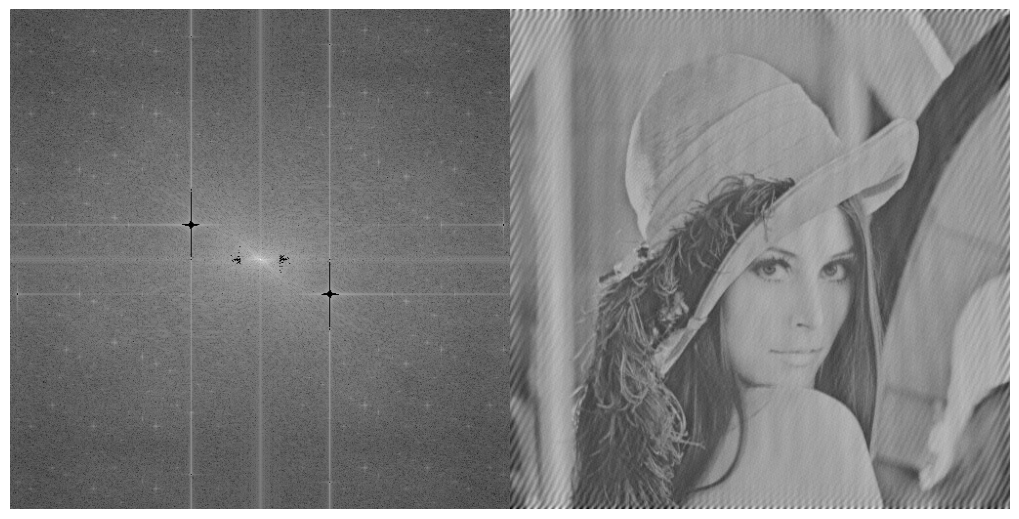

In [174]:
d = 20
alpha = 0.65
magnitude, new_image = auto_lines_deleter(lena_diag,  alpha=alpha, d=d)
magnitude, new_image = normalize(magnitude), normalize(new_image)
show_gray(np.hstack([magnitude, new_image]))
print(f'mse = {mse(new_image, lena_gray_fix):.1f}')


Чем больше частота шума (чем меньше период), тем дальше от главной гармоники находятся шумовые, тем легче 

**4. (5 баллов)**

Подавите шум на изображении $lena\_color\_512\_noise.tif$. Вычислите среднеквадратичную ошибку ($MSE$) для полученного результата и изображения $lena\_color\_512.tif$. Задача будет засчитана при $MSE < 150$. Тот, у кого по результатам проверки будет наименьшее значение $MSE$ среди всех студентов для этой задачи, получит призовую шоколадку.

2184.1810162862143


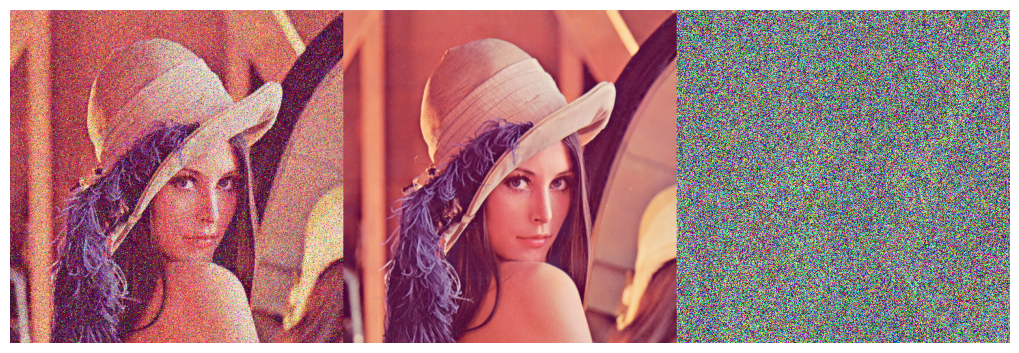

In [175]:
img_noised = cv2.imread(str(sources_path / "lena_color_512-noise.tif"))
img_colored = cv2.imread(str(sources_path / "lena_color_512.tif"))

print(mse(img_noised, img_colored))
show_bgr(np.hstack([img_noised, img_colored, np.abs(img_noised - img_colored)]))

149.23622131347656


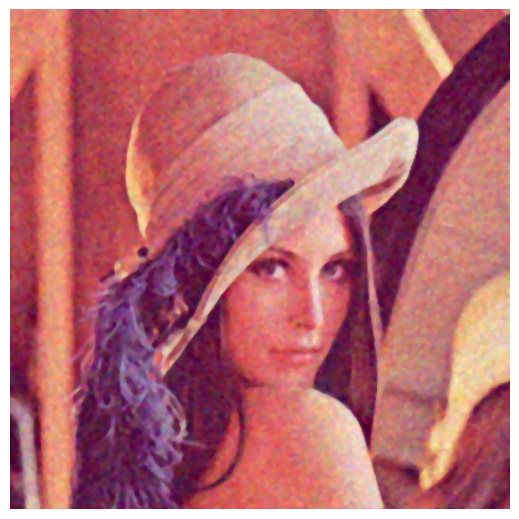

In [176]:
def filter(image):
    res = cv2.medianBlur(image,3)
    res = cv2.medianBlur(res,5)
    return res

image = filter(img_noised)
print(mse(image, img_colored))
show_bgr(image)

149.77550506591797


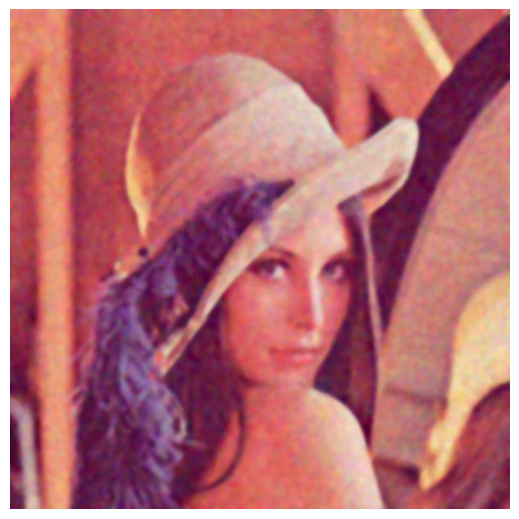

In [177]:
def filter(image):
    res = cv2.medianBlur(image,7)
    res = cv2.GaussianBlur(res,(5, 5), 0)
    return res

image = filter(img_noised)
print(mse(image, img_colored))
show_bgr(image)

109.74985249837239


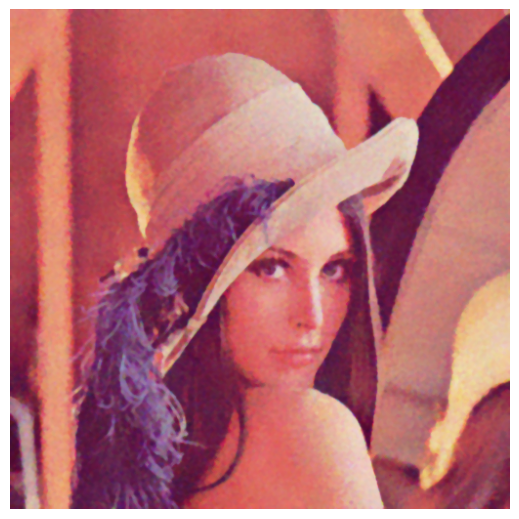

In [178]:
def filter(image, filter_seq):
    channels = cv2.split(image)
    res = []
    for channel in channels:
        out = channel
        for filter, x in filter_seq:
            if filter == 'gauss':
                out = cv2.GaussianBlur(out,(x,x),0)
            elif filter == 'median':
                out = cv2.medianBlur(out,x)
            elif filter == 'bilateral':
                out = cv2.bilateralFilter(out, *x)
        res.append(out)
    return cv2.merge(res)

filter_seq = [
              ('median', 3),
              ('gauss', 3),
              ('bilateral', (30,15,100)),
              ('median', 3)           

]

image = filter(img_noised, filter_seq)
print(mse(image, img_colored))
show_bgr(image)

**5. (5 баллов)**

Выделите границы на изображении **cat.jpg**:

* при помощи градиента и фильтров собеля
* при помощи лапласиана
* используя алгоритм $canny$

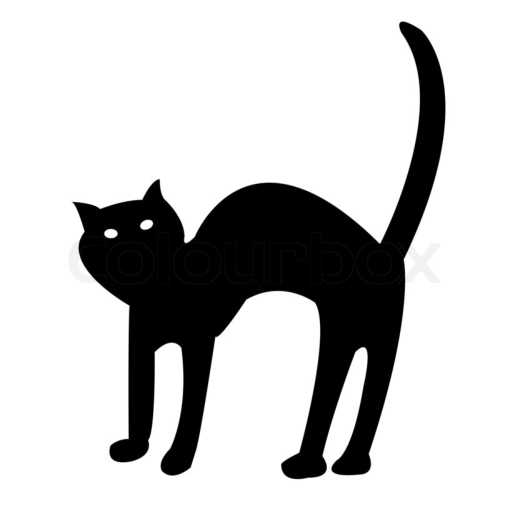

In [179]:
img = cv2.imread(str(sources_path / "cat.jpg"), 0)
show_gray(img)

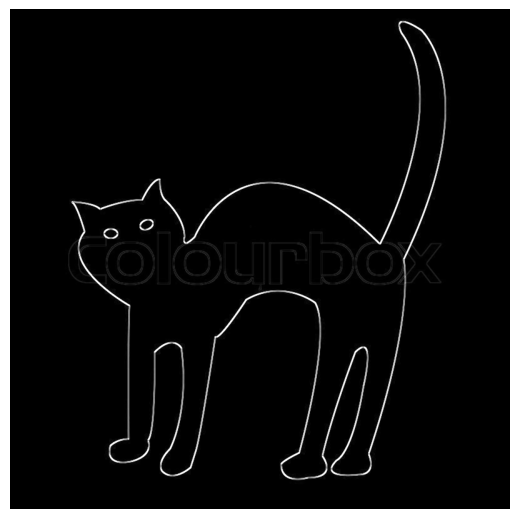

In [180]:
def grad_bound(image):
    grad_x = cv2.Sobel(image, cv2.CV_16S, 1, 0, ksize=3)
    grad_y = cv2.Sobel(image, cv2.CV_16S, 0, 1, ksize=3)
    grad_x = cv2.convertScaleAbs(grad_x)
    grad_y = cv2.convertScaleAbs(grad_y)
    out = cv2.addWeighted(grad_x, 0.5, grad_y, 0.5, 0)
    # out = cv2.convertScaleAbs((grad_x**2 + grad_y**2)**0.5)
    return out

def laplass_bound(image):
    out = cv2.Laplacian(image, cv2.CV_16S, ksize=3)
    return cv2.convertScaleAbs(out)

def canny_bound(image):
    return cv2.Canny(image, 100, 120)

show_gray(grad_bound(img))


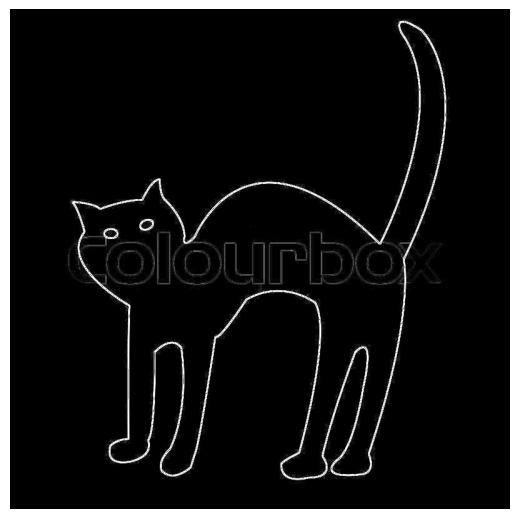

In [181]:
show_gray(laplass_bound(img))

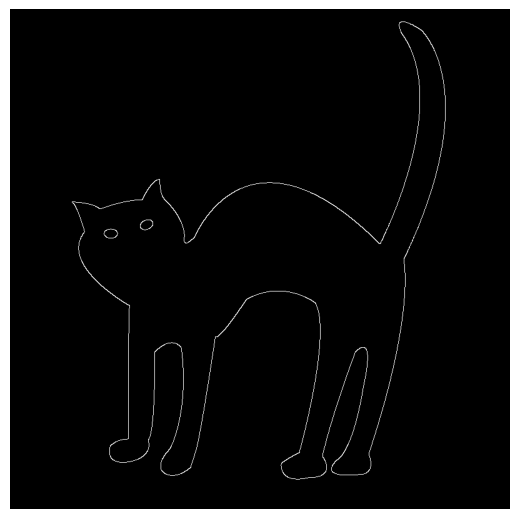

In [182]:
show_gray(canny_bound(img))